In [1]:
import scanpy as sc
import celltypist
import time
import numpy as np

In [24]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                         frameon=True, vector_friendly=True, fontsize=14, figsize=[7,7], color_map=None, 
                         format='pdf', facecolor=None, transparent=False,)

In [25]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

## Read in vivo and in vitro datasets

Data must be normalised and log-transformed 

In [4]:
# FETAL 
females_post10pcw = sc.read('/nfs/team292/vl6/FetalReproductiveTract/post_10pcw_females.202412.h5ad')
females_post10pcw.shape

(227932, 36601)

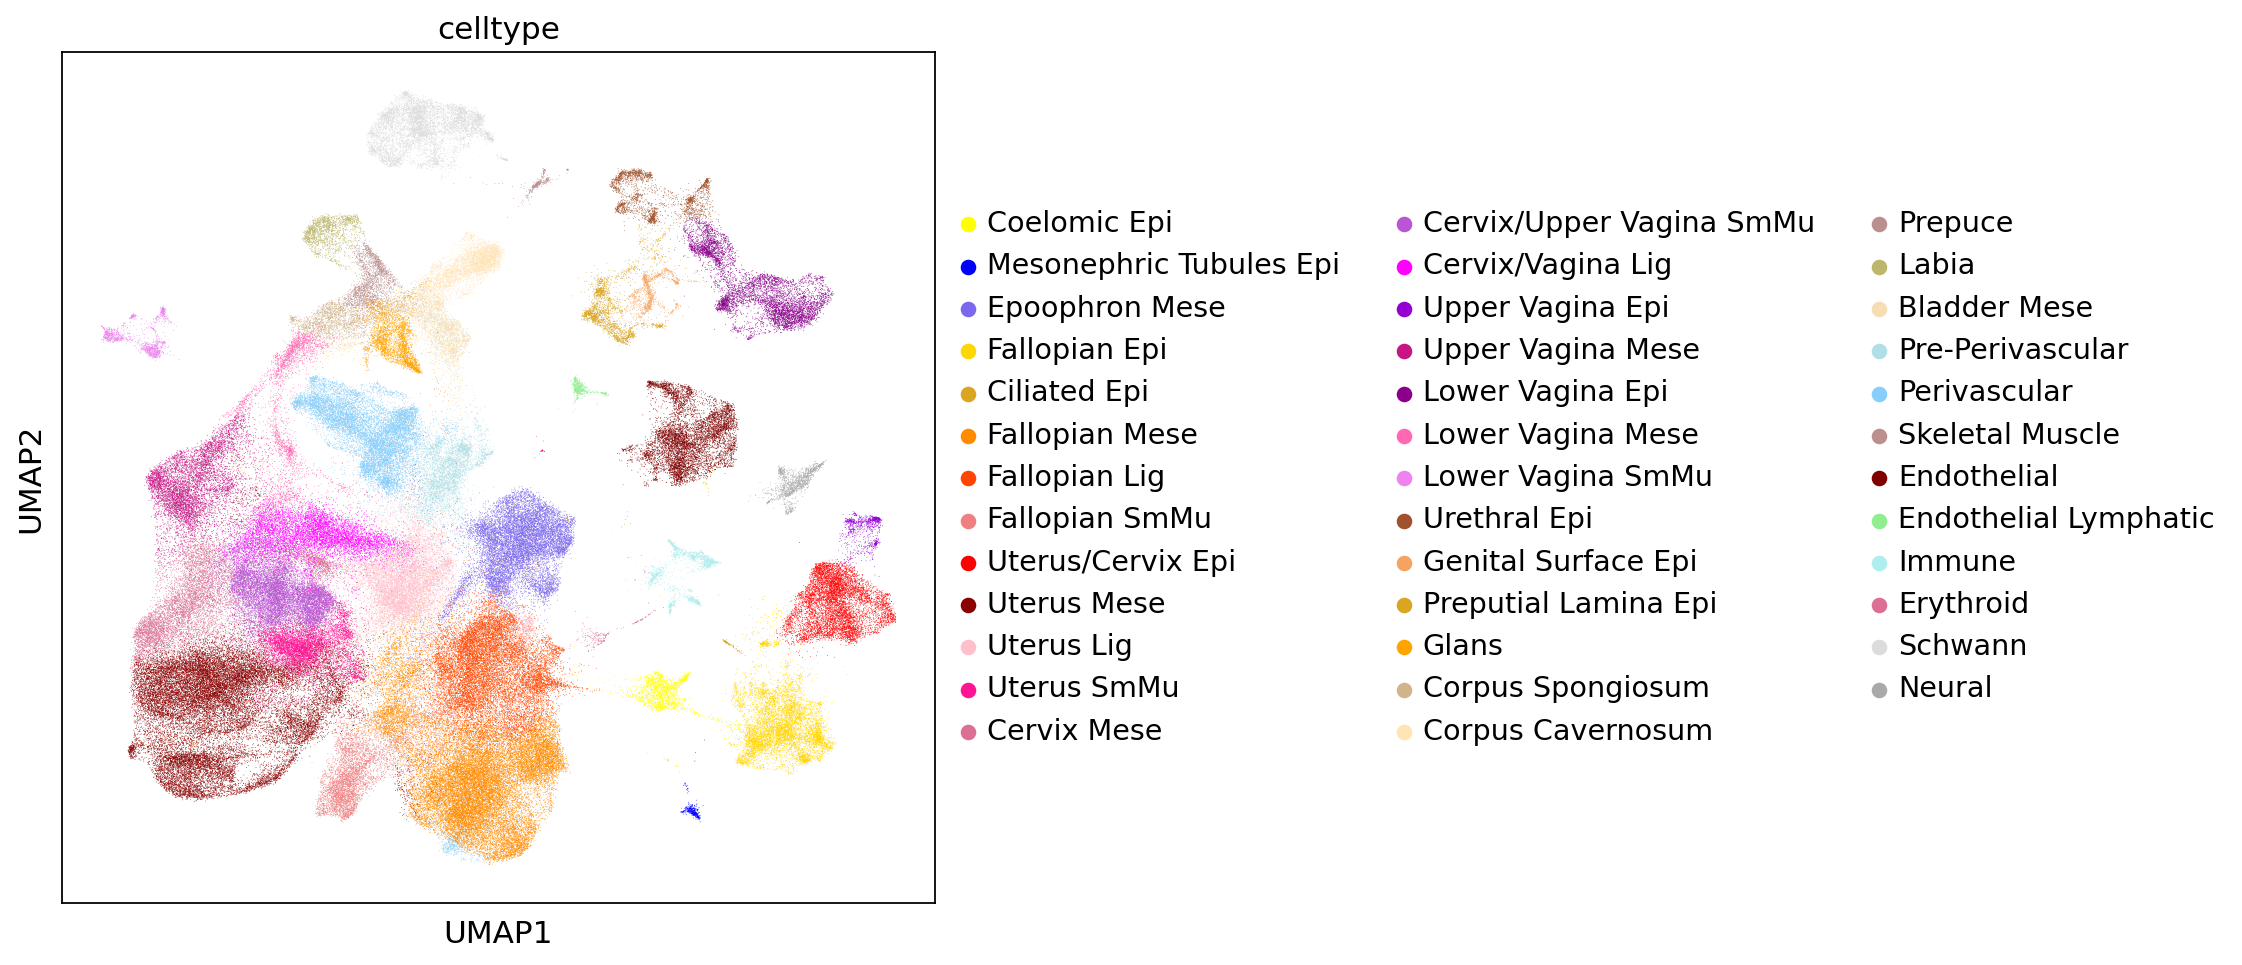

In [7]:
sc.pl.umap(females_post10pcw, color="celltype")

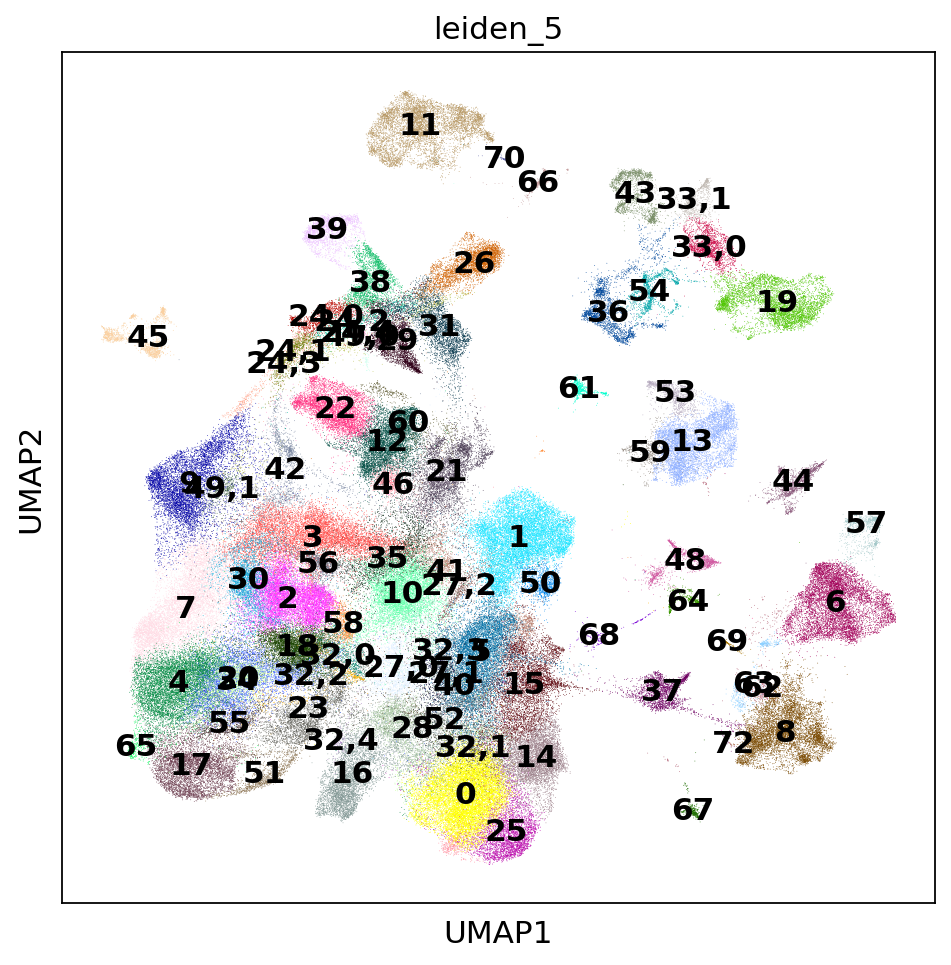

In [8]:
sc.pl.umap(females_post10pcw, color="leiden_5", legend_loc = 'on data')

In [9]:
females_post10pcw = females_post10pcw[[i in ['57', '33,0', '69', '6'] for i in females_post10pcw.obs['leiden_5']]]

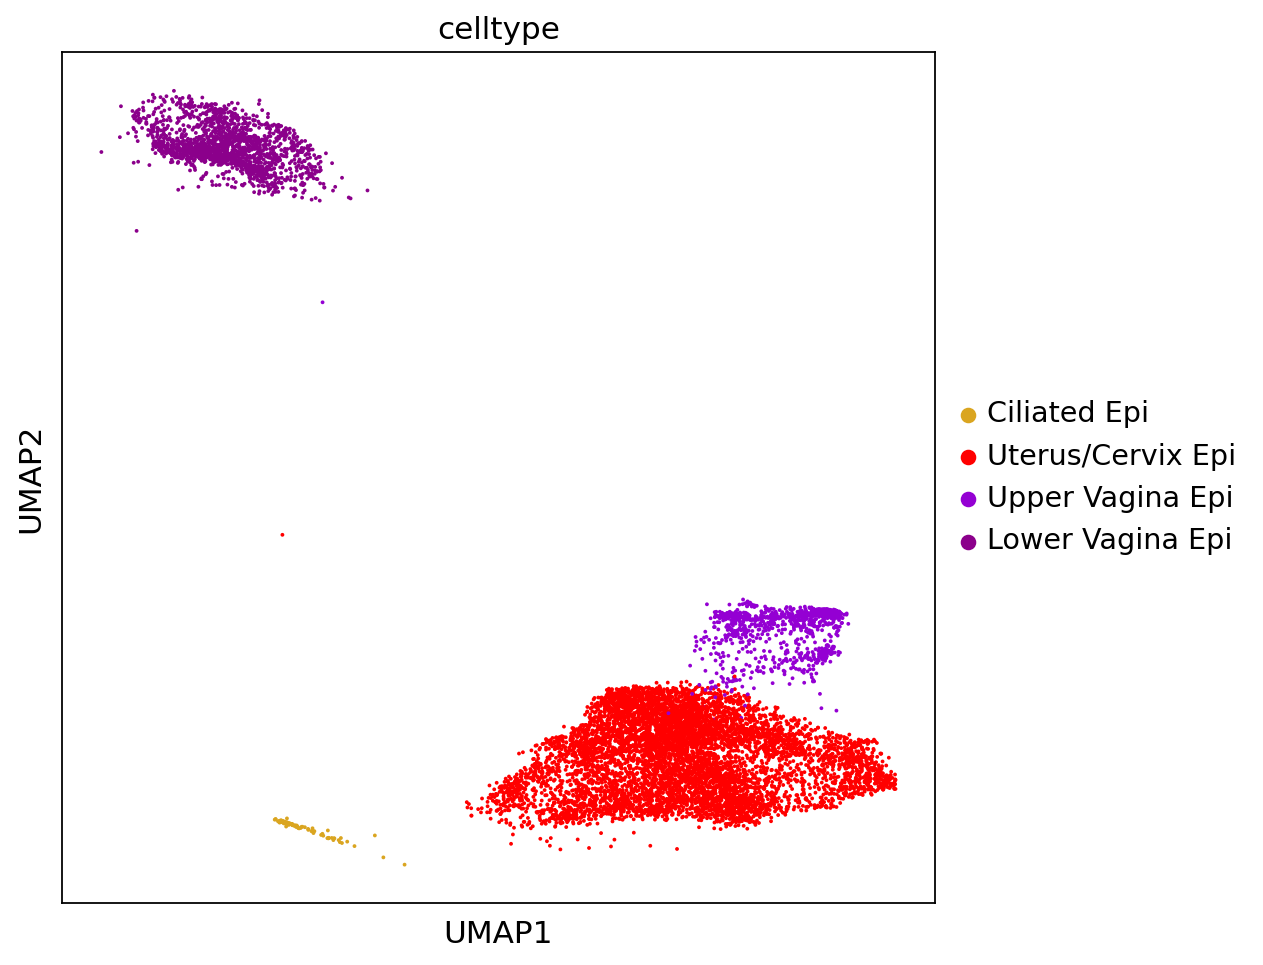

In [10]:
sc.pl.umap(females_post10pcw, color="celltype")

In [7]:
import anndata

In [12]:
invivo = anndata.AnnData(X = females_post10pcw.raw.X, var = females_post10pcw.raw.var, obs = females_post10pcw.obs)
invivo.shape

(10233, 36601)

In [13]:
sc.pp.filter_genes(invivo, min_cells = 50)

In [14]:
invivo.raw = invivo.copy()

In [15]:
sc.pp.normalize_total(invivo, target_sum = 1e4, inplace=True)
sc.pp.log1p(invivo)

In [16]:
invivo.shape

(10233, 18108)

In [15]:
# Select sample used for deriving organoids
organoids = sc.read('/nfs/team292/vl6/FetalReproductiveTract/organoids_ctrls.h5ad')
organoids

AnnData object with n_obs × n_vars = 21891 × 21655
    obs: 'n_counts', 'n_genes', 'sample', 'percent_mito', 'percent_ribo', 'doublet_scores', 'predicted_doublets', 'donor', 'stage_pcw', 'sex', 'condition', 'timepoint', 'batch', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype'
    var: 'GeneID-0', 'GeneName-0', 'n_cells-0', 'GeneID-1', 'GeneName-1', 'n_cells-1', 'GeneID-10', 'GeneName-10', 'n_cells-10', 'GeneID-11', 'GeneName-11', 'n_cells-11', 'GeneID-12', 'GeneName-12', 'n_cells-12', 'GeneID-13', 'GeneName-13', 'n_cells-13', 'GeneID-14', 'GeneName-14', 'n_cells-14', 'GeneID-15', 'GeneName-15', 'n_cells-15', 'GeneID-16', 'GeneName-16', 'n_cells-16', 'GeneID-17', 'GeneName-17', 'n_cells-17', 'GeneID-18', 'GeneName-18', 'n_cells-18', 'GeneID-19', 'GeneName-19', 'n_cells-19', 'GeneID-2', 'GeneName-2', 'n_cells-2', 'GeneID-20', 'GeneName-20', 'n_cells-20', 'GeneID-21', 'GeneName-21', 'n_cells-21', 'GeneID-3', 'GeneName-3', 'n_cells-3', 'GeneID-4', 'GeneName-4', 'n_cells-4', 'GeneID-5

In [16]:
organoids = anndata.AnnData(X = organoids.raw.X, var = organoids.raw.var, obs = organoids.obs)
organoids.shape

(21891, 21655)

In [17]:
sc.pp.filter_genes(organoids, min_cells = 10)

In [18]:
organoids.raw = organoids.copy()

In [19]:
sc.pp.normalize_total(organoids, target_sum = 1e4, inplace=True)
sc.pp.log1p(organoids)

In [20]:
organoids.shape

(21891, 21279)

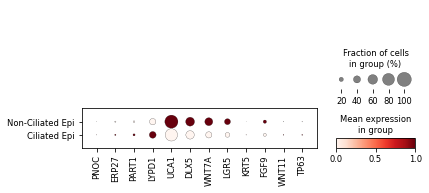

In [21]:
sc.pl.dotplot(organoids, var_names = ['PNOC', 'ERP27', 'PART1', 'LYPD1', 'UCA1', 'DLX5', 'WNT7A', 'LGR5', 
                                     'KRT5', 'FGF9', 'WNT11', 'TP63'], 
             groupby = 'celltype', use_raw = False, standard_scale = 'var')

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 49 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'F', 'G', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'T', 'U', 'X', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'x', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 36, 38, 39, 40, 41, 42, 46, 47, 48, 49, 50, 51, 53, 55, 56, 59, 68, 70, 71, 72, 73, 74, 76, 79, 81, 82, 83, 85, 86, 87, 88, 91]
Closed glyph list over 'GSUB': 54 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'F', 'G', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'T', 'U', 'X', 'a', 'c', 'd', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'g', 'hyphen',

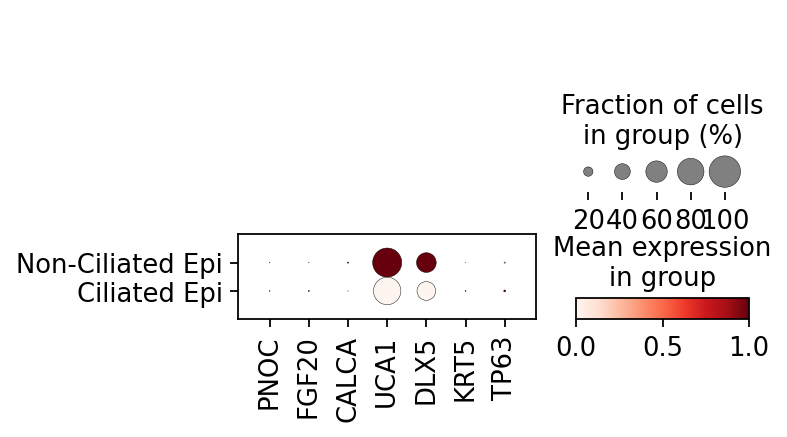

In [27]:
sc.pl.dotplot(organoids, var_names = ['PNOC', 'FGF20', 'CALCA',  'UCA1', 'DLX5', 
                                     'KRT5', 'TP63'], 
             groupby = 'celltype', use_raw = False, standard_scale = 'var', save = '_reviewer_22')

## Downsample cells from each cell type to a given number

In [21]:
# Random downsampling per cell type 
import random
from itertools import chain
def downsample(adata, labels, n): 
    
    myindex = adata.obs[labels].value_counts().index 
    myvalues = adata.obs[labels].value_counts().values
    clusters = pd.Series(myvalues, index = myindex)
    
    # Find clusters with > n cells 
    cl2downsample = clusters.index[ clusters.values > n ]

    # save all barcode ids from small clusters
    holder = []
    holder.append( adata.obs_names[[ i not in cl2downsample for i in adata.obs[labels] ]] ) 

    # randomly sample n cells in the cl2downsample
    for cl in cl2downsample:
        print(cl)
        cl_sample = adata[[ i == cl for i in adata.obs[labels]]].obs_names
        cl_downsample = random.sample(set(cl_sample), n )
        holder.append(cl_downsample)
    
    # samples to include
    samples = list(chain(*holder))

    # Filter adata_count
    adata = adata[[ i in samples for i in adata.obs_names ]]
    return adata

In [22]:
import pandas as pd

In [23]:
invivo = downsample(invivo, 'celltype', 2000)
invivo.shape

Fallopian Epi
Uterus/Cervix Epi
Lower Vagina Epi


(7078, 20489)

A feature selection step will restrict the number of genes during training, and can improve both training efficiency and prediction accuracy. It is recommended in most cases (though CellTypist models are proved to be robust when all genes are used).

One example of feature selection is using the scanpy.pp.highly_variable_genes. Depending on the datasets, you may need to take into account batch effects (e.g. by specifying batch_key), add/remove a specific list of genes (e.g. VDJ genes for immune cells), combine high-confidence features across zoomed-in compartments, or any other approaches tailored to your data.

In [24]:
# Use `celltypist.train` to quickly train a rough CellTypist model.
# You can also set `mini_batch = True` to enable mini-batch training.
t_start = time.time()
model_fs = celltypist.train(invivo, 'celltype', n_jobs = 10, max_iter = 5, use_SGD = True)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🍳 Preparing data before training
🔬 Input data has 10233 cells and 18108 genes
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
✅ Model training done!


Time elapsed: 5.371721267700195 seconds


This model is trained from all genes with only five epochs, and thus is not accurate enough for cell type prediction. But the information about genes can be utilised. Here, we drew top 100 important genes from each cell type as ranked by their absolute regression coefficients associated with the given cell type. For datasets with only several cell types, you may want to increase the top gene number from 100 to for example 300 in order to get a sufficient number of genes for final use.

In [25]:
gene_index = np.argpartition(np.abs(model_fs.classifier.coef_), -200, axis = 1)[:, -200:]

In [26]:
gene_index = np.unique(gene_index)

In [27]:
len(gene_index)

740

In [28]:
invivo[:, gene_index].var_names

Index(['ABCB1', 'ABI3BP', 'ABO', 'AC002463.1', 'AC004816.1', 'AC004832.1',
       'AC005037.1', 'AC007906.2', 'AC009237.14', 'AC013264.1',
       ...
       'ZNF148', 'ZNF295-AS1', 'ZNF33B', 'ZNF385A', 'ZNF512B', 'ZNF518A',
       'ZNF561-AS1', 'ZNF677', 'ZNF761', 'ZNF787'],
      dtype='object', length=740)

In [29]:
print(f"Number of genes selected: {len(gene_index)}")

Number of genes selected: 740


In [30]:
# Add `check_expression = False` to bypass expression check with only a subset of genes.
t_start = time.time()
model = celltypist.train(invivo[:, gene_index], 'celltype', check_expression = False, n_jobs = 10, max_iter = 300)
t_end = time.time()
print(f"Time elapsed: {(t_end - t_start)/60} minutes")

🍳 Preparing data before training
🔬 Input data has 10233 cells and 740 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!


Time elapsed: 0.05660479466120402 minutes


In [31]:
# Save the model.
model.write('/nfs/team292/vl6/FetalReproductiveTract/celltypist_invivo_organoids.pkl')

In [32]:
# CellTypist prediction with over-clustering and majority-voting.
t_start = time.time()
predictions = celltypist.annotate(organoids, model = '/nfs/team292/vl6/FetalReproductiveTract/celltypist_invivo_organoids.pkl',
                                  majority_voting = True)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🔬 Input data has 21891 cells and 17618 genes
🔗 Matching reference genes in the model
🧬 647 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


Time elapsed: 64.13001990318298 seconds


The results include both predicted cell type labels (predicted_labels), over-clustering result (over_clustering), and predicted labels after majority voting in local subclusters (majority_voting). Note in the predicted_labels, each query cell gets its inferred label by choosing the most probable cell type among all possible cell types in the given model.

In [33]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
HD_F_GON15290542_TAGCCGGCAGTCAGCC,Uterus/Cervix Epi,196,Uterus/Cervix Epi
HD_F_GON15290542_TGGGCGTTCCAAACTG,Uterus/Cervix Epi,196,Uterus/Cervix Epi
HD_F_GON15290542_TCCCGATCACAGAGGT,Uterus/Cervix Epi,81,Upper Vagina Epi
HD_F_GON15290542_TGAGAGGAGCATGGCA,Uterus/Cervix Epi,196,Uterus/Cervix Epi
HD_F_GON15290542_ACCTTTAGTCGAATCT,Uterus/Cervix Epi,200,Uterus/Cervix Epi
...,...,...,...
HD_F_GON15290556_CCCTCCTTCATTATCC,Uterus/Cervix Epi,8,Uterus/Cervix Epi
HD_F_GON15290556_GTGGGTCGTGTAAGTA,Uterus/Cervix Epi,99,Uterus/Cervix Epi
HD_F_GON15290556_CTAAGACCAACACCTA,Uterus/Cervix Epi,69,Uterus/Cervix Epi
HD_F_GON15290556_GCCAAATTCTGGAGCC,Uterus/Cervix Epi,8,Uterus/Cervix Epi


In [34]:
predictions.adata.obs['celltype'].value_counts()

Non-Ciliated Epi    20604
Ciliated Epi         1287
Name: celltype, dtype: int64

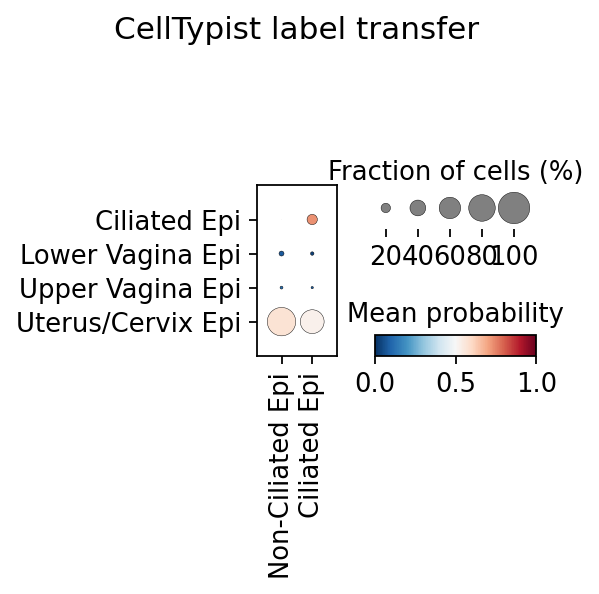

In [35]:
# You can also change the value of `use_as_prediction` to `predicted_labels` to compare the raw prediction result with the pre-defined cell types.
celltypist.dotplot(predictions, use_as_reference = 'celltype', use_as_prediction = 'predicted_labels')

In [36]:
predictions.predicted_labels['predicted_labels'] = predictions.predicted_labels['predicted_labels'].astype('category')

In [37]:
predictions.predicted_labels['predicted_labels'].value_counts()

Uterus/Cervix Epi    18873
Lower Vagina Epi      1827
Upper Vagina Epi       899
Ciliated Epi           292
Name: predicted_labels, dtype: int64

In [38]:
predictions.predicted_labels['predicted_labels'] = predictions.predicted_labels['predicted_labels'].cat.reorder_categories([
   'Ciliated Epi', 'Uterus/Cervix Epi', 'Upper Vagina Epi', 
    'Lower Vagina Epi'
])

In [39]:
predictions.adata.obs['celltype'] = predictions.adata.obs['celltype'].astype('category')
predictions.adata.obs['celltype'] = predictions.adata.obs['celltype'].cat.reorder_categories([
    'Ciliated Epi', 'Non-Ciliated Epi'
])

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 46 glyphs before
Glyph names: ['.notdef', '.null', 'C', 'E', 'F', 'L', 'M', 'N', 'T', 'U', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'six', 'slash', 'space', 't', 'two', 'u', 'v', 'w', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 38, 40, 41, 47, 48, 49, 55, 56, 57, 68, 69, 70, 71, 72, 73, 74, 76, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92]
Closed glyph list over 'GSUB': 51 glyphs after
Glyph names: ['.notdef', '.null', 'C', 'E', 'F', 'L', 'M', 'N', 'T', 'U', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'g', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'par

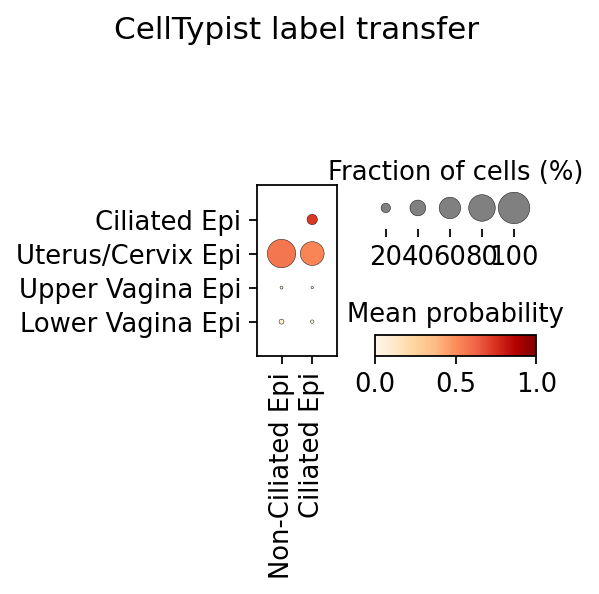

In [40]:
# You can also change the value of `use_as_prediction` to `predicted_labels` to compare the raw prediction result with the pre-defined cell types.
celltypist.dotplot(predictions, use_as_reference = 'celltype', use_as_prediction = 'predicted_labels', 
                   cmap = 'OrRd',
                  save = '_invivo_organoids.pdf')